# Differing GRAE Results

In [1]:
from Helpers.grae_pipeline_helpers import read_all_graeBuild_results
import pandas as pd

2025-02-24 11:10:04.754298: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-24 11:10:04.776022: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-02-24 11:10:04.782718: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-24 11:10:04.799343: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-02-24 11:10:06.668211: W tensorflow/compiler/tf2

In [2]:
grae_results = read_all_graeBuild_results()

In [3]:
grae_results

,method,dataset,split,lam,grae_build,MSE,full_rf_oob,full_knn_scoreA,full_rf_scoreA,full_knn_metricA,...,full_rf_metricB,pred_rf_oob,pred_knn_scoreA,pred_rf_scoreA,pred_knn_metricA,pred_rf_metricA,pred_knn_scoreB,pred_rf_scoreB,pred_knn_metricB,pred_rf_metricB
0,NAMA,heart_failure,random,100,original,0.107139,0.707113,0.683333,0.666667,0.644619,...,0.644609,0.658996,0.733333,0.633333,0.685926,0.612623,0.633333,0.566667,0.507292,0.469772
1,MASH,iris,skewed,100,anchor_loss100,0.006816,0.866667,0.866667,0.833333,0.866667,...,0.932407,0.820833,0.900000,0.866667,0.899542,0.864815,0.933333,0.900000,0.932407,0.897176
2,MASH,parkinsons,skewed,100,original,0.016461,0.871795,0.794872,0.794872,0.794872,...,0.897436,0.881410,0.692308,0.769231,0.682228,0.756879,0.897436,0.846154,0.897436,0.834188
3,MAGAN,ComputerHardware,distort,100,anchor_loss100,0.025578,0.664873,0.707875,0.631856,0.428433,...,0.582439,0.814745,0.696675,0.867351,0.436569,0.288703,0.678965,0.628077,0.449133,0.483420
4,MASH-,ConcreteSlumpTest,skewed,100,anchor_loss150,0.073414,0.548429,-0.388599,-0.179322,1.067226,...,0.876749,0.672902,0.125127,-0.228325,0.847111,1.003748,0.196662,0.127045,0.811740,0.846182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4483,JLMA,balance_scale,turn,100,anchor_loss150,0.028080,0.776000,0.768000,0.784000,0.745829,...,0.761396,0.768000,0.768000,0.752000,0.745829,0.740329,0.776000,0.808000,0.753442,0.796101
4484,MASH,hepatitis,distort,100,anchor_loss050,0.001992,0.790909,0.500000,0.500000,0.489583,...,0.425641,0.786364,0.607143,0.607143,0.602581,0.594203,0.571429,0.464286,0.569231,0.463602
4485,SSMA,EnergyEfficiency,distort,100,anchor_loss050,0.096418,-0.004676,0.683923,0.513577,0.573306,...,1.170909,0.029526,-0.118302,-0.336778,1.078373,1.179015,0.448091,-0.116497,0.757571,1.077503
4486,MASH,ionosphere,even,100,anchor_loss150,0.022049,0.898214,0.802817,0.873239,0.792015,...,0.805410,0.898214,0.802817,0.788732,0.797174,0.775473,0.746479,0.788732,0.732590,0.775473


In [4]:
grae_results[grae_results.columns[4:]].groupby("grae_build").mean().reset_index()#.plot(x="grae_build", y="MSE", kind="bar", title="MSE for GRAE")

,grae_build,MSE,full_rf_oob,full_knn_scoreA,full_rf_scoreA,full_knn_metricA,full_rf_metricA,full_knn_scoreB,full_rf_scoreB,full_knn_metricB,full_rf_metricB,pred_rf_oob,pred_knn_scoreA,pred_rf_scoreA,pred_knn_metricA,pred_rf_metricA,pred_knn_scoreB,pred_rf_scoreB,pred_knn_metricB,pred_rf_metricB
0,anchor_loss050,0.080149,0.584347,0.611481,0.591102,0.671330,0.676539,0.525304,0.495382,0.658728,0.672221,0.589380,0.509577,0.467068,0.652653,0.667117,0.581379,0.544402,0.664185,0.667762
1,anchor_loss100,0.080386,0.584063,0.612912,0.589764,0.671245,0.677634,0.523585,0.493901,0.658697,0.673597,0.589952,0.507820,0.466977,0.653515,0.667431,0.581898,0.543738,0.663122,0.668418
2,anchor_loss150,0.079838,0.584841,0.613972,0.592139,0.671838,0.676063,0.525728,0.498328,0.658407,0.672785,0.590406,0.508885,0.467967,0.652553,0.666780,0.583046,0.545902,0.661798,0.665290
3,original,0.080192,0.584222,0.612413,0.589221,0.670999,0.676979,0.523854,0.497315,0.658204,0.673437,0.588841,0.506999,0.470967,0.651288,0.666817,0.579196,0.548793,0.664055,0.668360


In [5]:
grae_results[grae_results.columns[4:]].groupby("grae_build").mean().reset_index()[grae_results.columns[15:]].rank(numeric_only=True, method="max")

,pred_rf_oob,pred_knn_scoreA,pred_rf_scoreA,pred_knn_metricA,pred_rf_metricA,pred_knn_scoreB,pred_rf_scoreB,pred_knn_metricB,pred_rf_metricB
0,2.0,4.0,2.0,3.0,3.0,2.0,2.0,4.0,2.0
1,3.0,2.0,1.0,4.0,4.0,3.0,1.0,2.0,4.0
2,4.0,3.0,3.0,2.0,1.0,4.0,3.0,1.0,1.0
3,1.0,1.0,4.0,1.0,2.0,1.0,4.0,3.0,3.0


In [6]:
grae_results[grae_results.columns[4:]].groupby("grae_build").mean().reset_index()[grae_results.columns[15:]].rank(numeric_only=True, method="max").sum(axis=1)

0    24.0
1    24.0
2    22.0
3    20.0
dtype: float64

In [7]:
grae_results[grae_results.columns[4:]].groupby("grae_build").mean().reset_index()[grae_results.columns[15:]].sum(axis=1)

0    5.343523
1    5.342871
2    5.342627
3    5.345315
dtype: float64

In [8]:
grae_results.columns

Index(['method', 'dataset', 'split', 'lam', 'grae_build', 'MSE', 'full_rf_oob',
       'full_knn_scoreA', 'full_rf_scoreA', 'full_knn_metricA',
       'full_rf_metricA', 'full_knn_scoreB', 'full_rf_scoreB',
       'full_knn_metricB', 'full_rf_metricB', 'pred_rf_oob', 'pred_knn_scoreA',
       'pred_rf_scoreA', 'pred_knn_metricA', 'pred_rf_metricA',
       'pred_knn_scoreB', 'pred_rf_scoreB', 'pred_knn_metricB',
       'pred_rf_metricB'],
      dtype='object')

<Axes: title={'center': 'Results'}, xlabel='grae_build'>

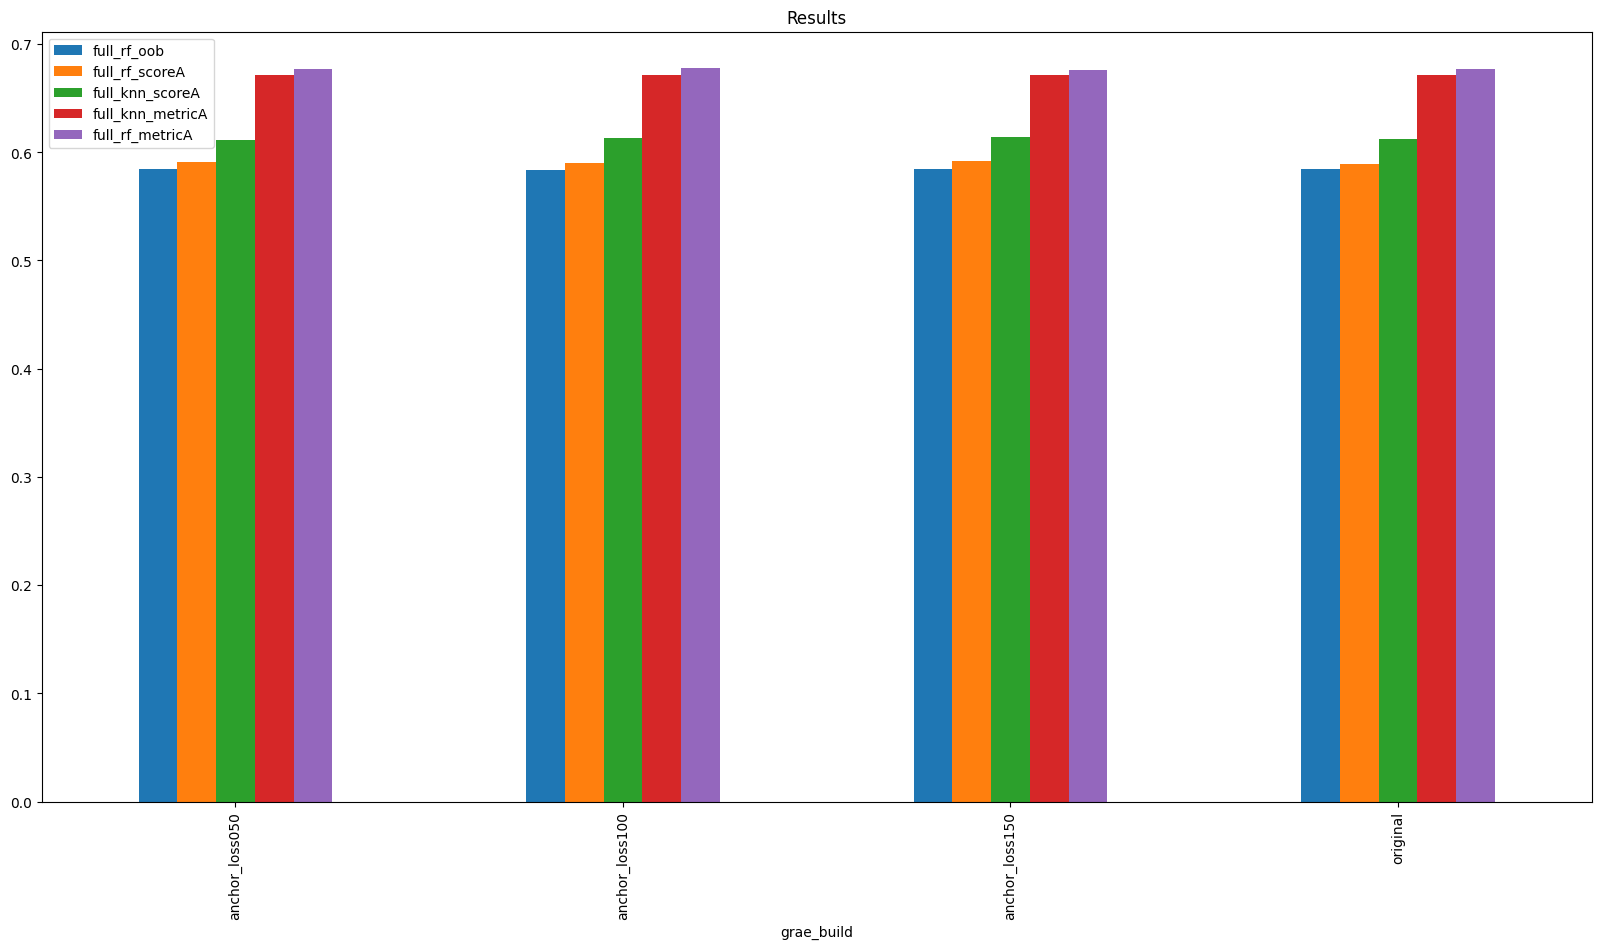

In [9]:
Col = grae_results.columns[4:][[0, 2,3,4,5,6]]
df = grae_results[Col].groupby("grae_build").mean().reset_index()
ordered_cols = ["grae_build"] + sorted(list(Col[1:]), key=lambda c: df[c].min())
df.plot(x="grae_build", y=ordered_cols[1:], kind="bar", title="Results", figsize=(20,10))